import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=1.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_train = pd.read_csv('./input/train.csv')
df_test = pd.read_csv('./input/test.csv')

In [3]:
df_train.head()
# feature : Pclass, Sex, Age, SibSp, Parch, Fare, Embarked
# target label : Survived

# not useful data : PassengerId, Name, Ticket, Cabin 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# check columns data
df_train.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [8]:
for col in df_train.columns:
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Survived  	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 19.87%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.00%
column: Cabin     	 Percent of NaN value: 77.10%
column: Embarked  	 Percent of NaN value: 0.22%


In [9]:
for col in df_test.columns:
    msg = 'column: {:10}\t Percent of NaN value: {:.2f}%'.format(
        col, 
        100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column: Pclass    	 Percent of NaN value: 0.00%
column: Name      	 Percent of NaN value: 0.00%
column: Sex       	 Percent of NaN value: 0.00%
column: Age       	 Percent of NaN value: 20.57%
column: SibSp     	 Percent of NaN value: 0.00%
column: Parch     	 Percent of NaN value: 0.00%
column: Ticket    	 Percent of NaN value: 0.00%
column: Fare      	 Percent of NaN value: 0.24%
column: Cabin     	 Percent of NaN value: 78.23%
column: Embarked  	 Percent of NaN value: 0.00%


<AxesSubplot:xlabel='Survived', ylabel='count'>

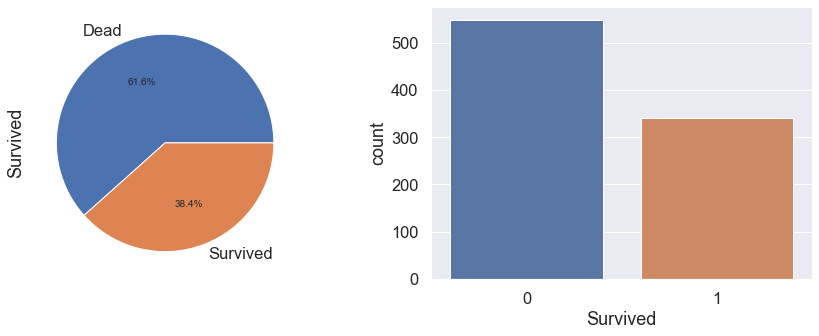

In [18]:
# check Target Label
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

labels = ['Dead', 'Survived']
df_train['Survived'].value_counts().plot.pie(ax=ax[0], autopct='%.1f%%', labels=labels)

sns.countplot(x='Survived', data=df_train)

In [20]:
# EDA (Exploratory Data Analysis)
# Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).count()

,Pclass,Survived
0,1,216
1,2,184
2,3,491


In [25]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).sum()

,Pclass,Survived
0,1,136
1,2,87
2,3,119


<AxesSubplot:xlabel='Pclass'>

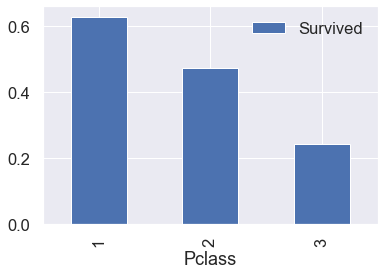

In [28]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().plot.bar()

<AxesSubplot:title={'center':'Pclass: Survived vs Dead'}, xlabel='Pclass', ylabel='count'>

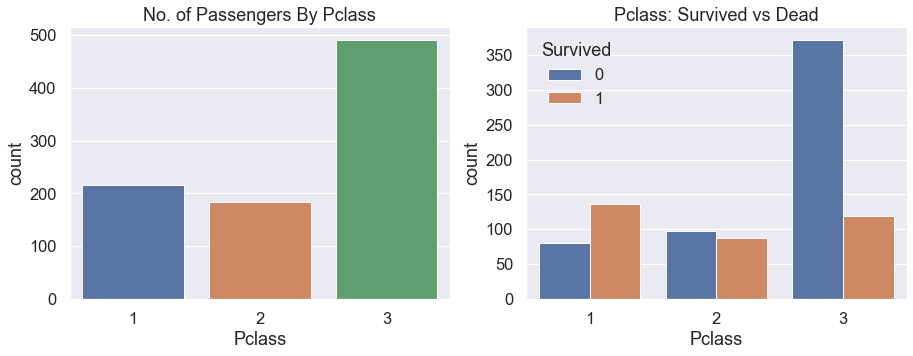

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('No. of Passengers By Pclass')
sns.countplot(x='Pclass', data=df_train, ax=ax[0])

ax[1].set_title('Pclass: Survived vs Dead')
sns.countplot(x='Pclass', hue='Survived', data=df_train, ax=ax[1])

<AxesSubplot:title={'center':'Sex: Survived vs Dead'}, xlabel='Sex', ylabel='count'>

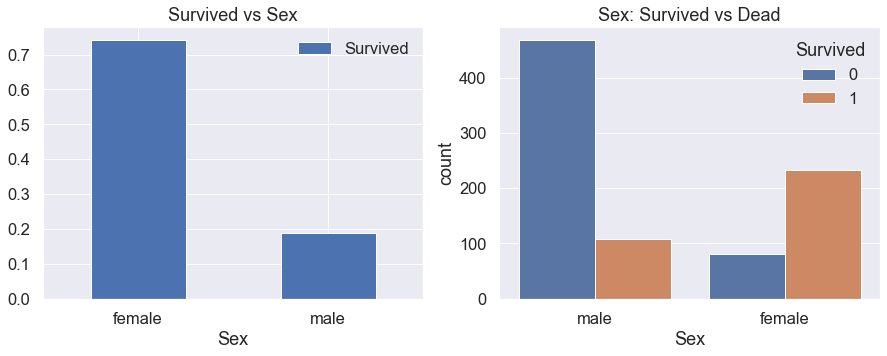

In [46]:
# Sex
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].set_title('Survived vs Sex')
df_train[['Sex', 'Survived']].groupby('Sex').mean().plot.bar(ax=ax[0], rot=0)

ax[1].set_title('Sex: Survived vs Dead')
sns.countplot(x='Sex', hue='Survived', data=df_train, ax=ax[1])

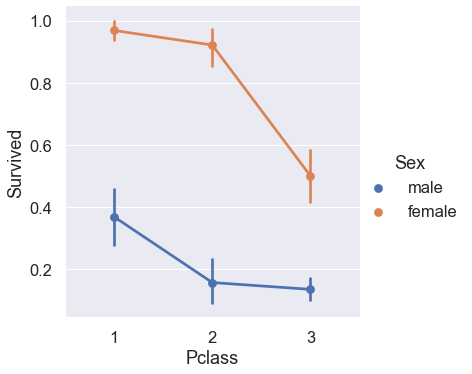

In [47]:
# Both Sex and Pclass with Survived
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train)

In [48]:
# Age
print('제일 나이가 많은 승객 : {:.1f} Years'.format(df_train.Age.max()))
print('제일 나이가 어린 승객 : {:.1f} Years'.format(df_train.Age.min()))
print('승객 평균 나이 : {:.1f} Years'.format(df_train.Age.mean()))

제일 나이가 많은 승객 : 80.0 Years
제일 나이가 어린 승객 : 0.4 Years
승객 평균 나이 : 29.7 Years


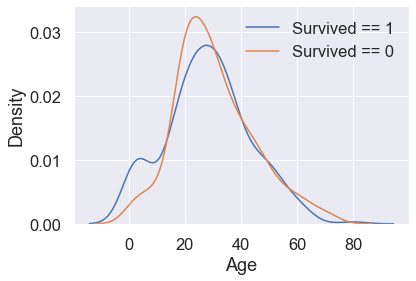

In [51]:
# 생존에 따른 Age Histogram
sns.kdeplot(df_train[df_train.Survived == 1].Age)
sns.kdeplot(df_train[df_train.Survived == 0].Age)
plt.legend(['Survived == 1', 'Survived == 0'])

Text(0.5, 0, 'Age')

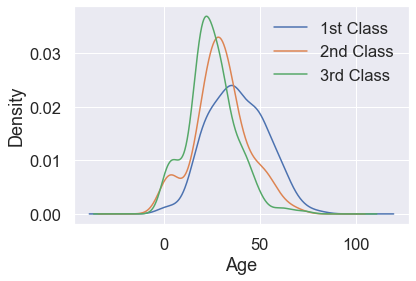

In [68]:
# Age distribution within classes
df_train.Age[df_train.Pclass == 1].plot(kind='kde')
df_train.Age[df_train.Pclass == 2].plot(kind='kde')
df_train.Age[df_train.Pclass == 3].plot(kind='kde')
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.xlabel('Age')

Text(0.5, 0, 'Range of Age(0~x)')

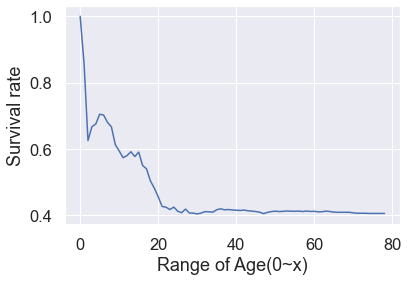

In [63]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(
        df_train[df_train.Age < i].Survived.sum() / len(df_train[df_train.Age < i].Survived))

plt.plot(cummulate_survival_ratio)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')

<AxesSubplot:xlabel='Sex', ylabel='Age'>

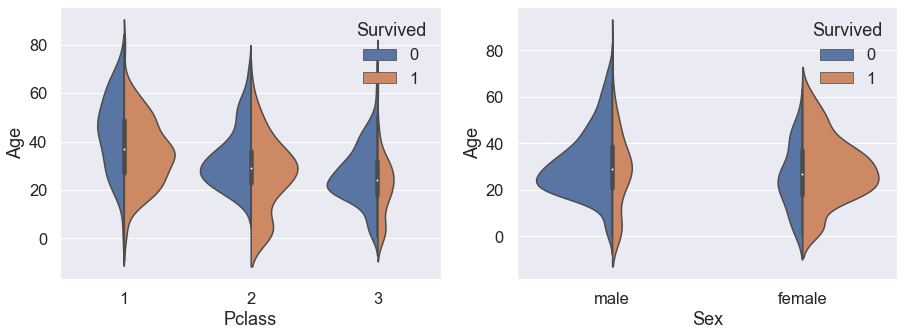

In [74]:
# Pclass, Sex, Age
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[0])
sns.violinplot(x='Sex', y='Age', hue='Survived', data=df_train, scale='count', split=True, ax=ax[1])

In [75]:
# Embarked
df_train[['Embarked', 'Survived']].groupby(['Embarked']).count()

,Survived
Embarked,
C,168
Q,77
S,644


In [76]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).sum()

,Survived
Embarked,
C,93
Q,30
S,217


In [77]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


<AxesSubplot:xlabel='Embarked'>

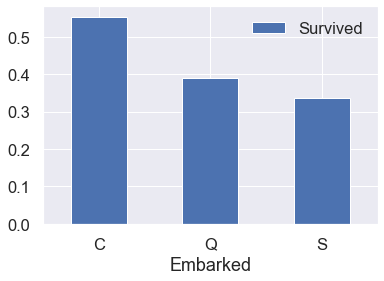

In [79]:
df_train[['Embarked', 'Survived']].groupby(['Embarked']).mean().plot.bar(rot=0)